<a href="https://colab.research.google.com/github/rakesh22230/Data-Mining-Lab/blob/main/All_Topics_Cover_beforeMID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/rakesh22230/Data-Mining-Lab/refs/heads/main/titanic.csv")

print("First five rows of the dataset: \n")
print(df.head(3))
print("\n")
print(df.isnull().sum())

First five rows of the dataset: 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [2]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [3]:
# remove columns
df = df.drop(["Ticket","Cabin","Embarked"],axis=1)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [4]:
# Noise Reduction using Binning Method
# Divide 'Age' into 5 equal-width bins
df["Age_bin"] = pd.cut(df["Age"], bins=5, labels=False)

# Replace each value with the mean of its bin
bin_means = df.groupby("Age_bin")["Age"].mean()
df["Age_smooth"] = df["Age_bin"].map(bin_means)

print(df[["Age", "Age_bin", "Age_smooth"]].head(15))

print("===========================================================")

# Divide 'Fare' into 5 equal-width bins
df["Fare_bin"] = pd.cut(df["Fare"], bins=5, labels=False)

# Replace each value with the mean of its bin (smoothing)
fare_bin_means = df.groupby("Fare_bin")["Fare"].mean()
df["Fare_smooth"] = df["Fare_bin"].map(fare_bin_means)

# Show first 15 rows to compare
print(df[["Fare", "Fare_bin", "Fare_smooth"]].head(15))


          Age  Age_bin  Age_smooth
0   22.000000        1   26.256680
1   38.000000        2   39.239362
2   26.000000        1   26.256680
3   35.000000        2   39.239362
4   35.000000        2   39.239362
5   29.699118        1   26.256680
6   54.000000        3   54.847826
7    2.000000        0    8.006700
8   27.000000        1   26.256680
9   14.000000        0    8.006700
10   4.000000        0    8.006700
11  58.000000        3   54.847826
12  20.000000        1   26.256680
13  39.000000        2   39.239362
14  14.000000        0    8.006700
       Fare  Fare_bin  Fare_smooth
0    7.2500         0    22.411942
1   71.2833         0    22.411942
2    7.9250         0    22.411942
3   53.1000         0    22.411942
4    8.0500         0    22.411942
5    8.4583         0    22.411942
6   51.8625         0    22.411942
7   21.0750         0    22.411942
8   11.1333         0    22.411942
9   30.0708         0    22.411942
10  16.7000         0    22.411942
11  26.5500         

In [5]:
dt = df.copy()
dx = df.copy()


df['Age'] = ( df['Age'] - df['Age'].min() ) / ( df['Age'].max() - df['Age'].min() ) # max min equation normalization

dt['Age'] = ( dt['Age'] - dt['Age'].mean() ) / ( dt['Age'].std() ) # z-score normalization or AGE

# preprocessing for Fare
df['Fare'] = ( df['Fare'] - df['Fare'].min() ) / ( df['Fare'].max() - df['Fare'].min() ) # max min equation normalization
dt['Fare'] = ( dt['Fare'] - dt['Fare'].mean() ) / ( dt['Fare'].std() )



In [6]:
print("Min-Max Normalization for [Fare,Age]: \n")
df

Min-Max Normalization for [Fare,Age]: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_bin,Age_smooth,Fare_bin,Fare_smooth
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,0.014151,1,26.256680,0,22.411942
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,0.139136,2,39.239362,0,22.411942
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,0.015469,1,26.256680,0,22.411942
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,0.103644,2,39.239362,0,22.411942
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,0.015713,2,39.239362,0,22.411942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,0.025374,1,26.256680,0,22.411942
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,0.058556,1,26.256680,0,22.411942
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,0.045771,1,26.256680,0,22.411942
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,0.058556,1,26.256680,0,22.411942


In [7]:
print("Z score Normalization for [Fare,Age]: \n")
dt

Z score Normalization for [Fare,Age]: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Age_bin,Age_smooth,Fare_bin,Fare_smooth
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592148,1,0,-0.502163,1,26.256680,0,22.411942
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638430,1,0,0.786404,2,39.239362,0,22.411942
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284503,0,0,-0.488580,1,26.256680,0,22.411942
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407697,1,0,0.420494,2,39.239362,0,22.411942
4,5,0,3,"Allen, Mr. William Henry",male,0.407697,0,0,-0.486064,2,39.239362,0,22.411942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.207592,0,0,-0.386454,1,26.256680,0,22.411942
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.822881,0,0,-0.044356,1,26.256680,0,22.411942
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000000,1,2,-0.176164,1,26.256680,0,22.411942
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.284503,0,0,-0.044356,1,26.256680,0,22.411942


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between Age and Fare columns
A = df["Age"].values.reshape(1, -1)
B = df["Fare"].values.reshape(1, -1)

cosine_age_fare = cosine_similarity(A, B)
print(f"\nCosine similarity between Age and Fare: {cosine_age_fare[0][0]:.3f}")



Cosine similarity between Age and Fare: 0.528


<Axes: xlabel='Fare'>

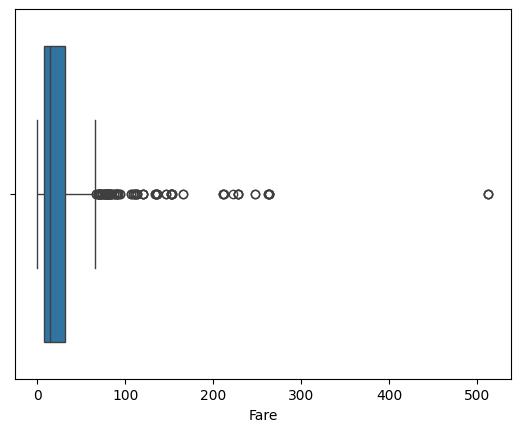

In [9]:
sns.boxplot(x=dx['Fare'])

<Axes: xlabel='Age'>

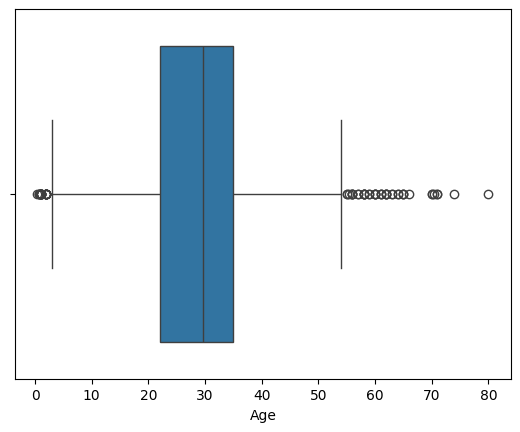

In [10]:
sns.boxplot(x=dx['Age'])